In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from model_functions import *
from plotting_functions import *
# from new_Adam import *
import no_gpu
import reproducible
from training_callback import BatchAccuracy

In [4]:
import time

In [5]:
X_train, X_val, y_train, y_val = mnist_prep()

In [6]:
# use samller dataset for increased speed
X_train_small = X_train[:1000, :]
X_val_small = X_val[:500, :]
y_train_small = y_train[:1000]
y_val_small = y_val[:500]

n_cols = X_train_small.shape[1]

In [7]:
layers = 5
neurons = [128, 128, 64, 32, 10]
n_cols = X_train_small.shape[1]
batch_size = 100
epochs = 10

Epoch 1/10
10/10 [==============================] - 0s 17ms/step - loss: 2.0682 - accuracy: 0.3570 - val_loss: 1.8012 - val_accuracy: 0.5560
Epoch 2/10
10/10 [==============================] - 0s 11ms/step - loss: 1.2685 - accuracy: 0.7170 - val_loss: 1.2019 - val_accuracy: 0.6620
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6592 - accuracy: 0.8350 - val_loss: 0.8035 - val_accuracy: 0.7520
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.3442 - accuracy: 0.9170 - val_loss: 0.6226 - val_accuracy: 0.8020
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1959 - accuracy: 0.9540 - val_loss: 0.5279 - val_accuracy: 0.8280
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1208 - accuracy: 0.9700 - val_loss: 0.5188 - val_accuracy: 0.8460
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0697 - accuracy: 0.9850 - val_loss: 0.4785 - val_accuracy: 0.8500
Epoch 8/10
10/10 [

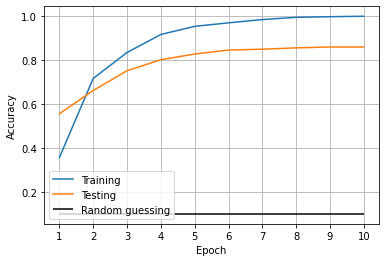

In [8]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols)
model = nn_model_compile(model,
                         optimizer = "adam")
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train_small,
                     y_train = y_train_small,
                     X_val = X_val_small,
                     y_val = y_val_small,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_acc(model)
# nn_save(model, "../models/model_test_small.h5")

In [9]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.01743369, -0.0448595 ,  0.01700593, ..., -0.08100501,
         -0.039437  , -0.01738876],
        [-0.05974199, -0.0050594 ,  0.01806217, ..., -0.04069512,
          0.04969868,  0.03359859],
        [-0.04995032,  0.06309575, -0.00772937, ..., -0.05693629,
          0.03480571, -0.04803716],
        ...,
        [ 0.06142421, -0.00991699,  0.04870585, ..., -0.05468635,
          0.06899758,  0.00282843],
        [-0.04510133,  0.04147224, -0.05598278, ...,  0.01716213,
         -0.0297642 ,  0.09859083],
        [-0.09908427,  0.00187593,  0.08837842, ...,  0.04840584,
          0.01531912,  0.0097312 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.03771355, -0.06422658,  0.04244307,  0.02122317,  0.05693149,
         0.04035236, -0.06044   , -0.03505882, -0.10205089,  0.04256657,
         0.0801106 ,  0.08120365,  0.04139135,  0.14188004,  0.06318817,
    

In [10]:
model.history.history

{'loss': [2.0681631565093994,
  1.2685341835021973,
  0.6592463850975037,
  0.34417566657066345,
  0.19594396650791168,
  0.12075728923082352,
  0.06968281418085098,
  0.041364505887031555,
  0.026097582653164864,
  0.015438340604305267],
 'accuracy': [0.3569999933242798,
  0.7170000076293945,
  0.8349999785423279,
  0.9169999957084656,
  0.9539999961853027,
  0.9700000286102295,
  0.9850000143051147,
  0.9950000047683716,
  0.9980000257492065,
  1.0],
 'val_loss': [1.8011852502822876,
  1.2019312381744385,
  0.8035430312156677,
  0.6225842237472534,
  0.5278695225715637,
  0.5188038945198059,
  0.47851794958114624,
  0.49224650859832764,
  0.49270910024642944,
  0.48919394612312317],
 'val_accuracy': [0.5559999942779541,
  0.6620000004768372,
  0.7519999742507935,
  0.8019999861717224,
  0.828000009059906,
  0.8460000157356262,
  0.8500000238418579,
  0.8560000061988831,
  0.8600000143051147,
  0.8600000143051147]}

In [11]:
model.evaluate(X_val_small, y_val_small)

16/16 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.8600


[0.48919394612312317, 0.8600000143051147]

In [12]:
model.predict(X_val_small)

array([[7.0068568e-06, 2.0200618e-08, 1.6574981e-08, ..., 9.9995947e-01,
        5.0841141e-08, 3.2960259e-05],
       [1.8246926e-07, 4.7575562e-05, 9.9928826e-01, ..., 7.8001472e-09,
        2.3808218e-05, 2.1625935e-06],
       [2.4883479e-06, 9.9972826e-01, 1.5383563e-04, ..., 8.0746788e-05,
        9.1711117e-06, 6.1359970e-06],
       ...,
       [4.1093939e-04, 1.5322960e-03, 3.4511152e-03, ..., 4.0449332e-03,
        9.6007936e-02, 1.6202688e-01],
       [4.5279858e-01, 4.5599641e-05, 8.5614010e-06, ..., 1.7920720e-03,
        8.3179614e-03, 5.3373045e-01],
       [1.1958780e-05, 1.1944060e-06, 1.9636193e-05, ..., 3.5528096e-06,
        5.2078220e-05, 9.6242368e-04]], dtype=float32)

In [13]:
weights = model.get_weights()
print(weights)

[array([[ 0.01743369, -0.0448595 ,  0.01700593, ..., -0.08100501,
        -0.039437  , -0.01738876],
       [-0.05974199, -0.0050594 ,  0.01806217, ..., -0.04069512,
         0.04969868,  0.03359859],
       [-0.04995032,  0.06309575, -0.00772937, ..., -0.05693629,
         0.03480571, -0.04803716],
       ...,
       [ 0.06142421, -0.00991699,  0.04870585, ..., -0.05468635,
         0.06899758,  0.00282843],
       [-0.04510133,  0.04147224, -0.05598278, ...,  0.01716213,
        -0.0297642 ,  0.09859083],
       [-0.09908427,  0.00187593,  0.08837842, ...,  0.04840584,
         0.01531912,  0.0097312 ]], dtype=float32), array([ 0.03771355, -0.06422658,  0.04244307,  0.02122317,  0.05693149,
        0.04035236, -0.06044   , -0.03505882, -0.10205089,  0.04256657,
        0.0801106 ,  0.08120365,  0.04139135,  0.14188004,  0.06318817,
        0.01912438, -0.03284929, -0.10077812, -0.02825487,  0.05429371,
       -0.07718289, -0.05885744, -0.1267307 , -0.04950554, -0.04764819,
        0.

In [14]:
y_true, y_pred = nn_class_pred_true(model, X_val_small, y_val_small, print_comp = True)

Prediction: 7, Actual: 7, True
Prediction: 2, Actual: 2, True
Prediction: 1, Actual: 1, True
Prediction: 0, Actual: 0, True
Prediction: 4, Actual: 4, True
Prediction: 1, Actual: 1, True
Prediction: 4, Actual: 4, True
Prediction: 9, Actual: 9, True
Prediction: 4, Actual: 5, False
Prediction: 9, Actual: 9, True
Prediction: 0, Actual: 0, True
Prediction: 2, Actual: 6, False
Prediction: 9, Actual: 9, True
Prediction: 0, Actual: 0, True
Prediction: 1, Actual: 1, True
Prediction: 5, Actual: 5, True
Prediction: 9, Actual: 9, True
Prediction: 7, Actual: 7, True
Prediction: 3, Actual: 3, True
Prediction: 4, Actual: 4, True
Prediction: 9, Actual: 9, True
Prediction: 6, Actual: 6, True
Prediction: 4, Actual: 6, False
Prediction: 5, Actual: 5, True
Prediction: 4, Actual: 4, True
Prediction: 0, Actual: 0, True
Prediction: 7, Actual: 7, True
Prediction: 4, Actual: 4, True
Prediction: 0, Actual: 0, True
Prediction: 1, Actual: 1, True
Prediction: 3, Actual: 3, True
Prediction: 1, Actual: 1, True
Predi

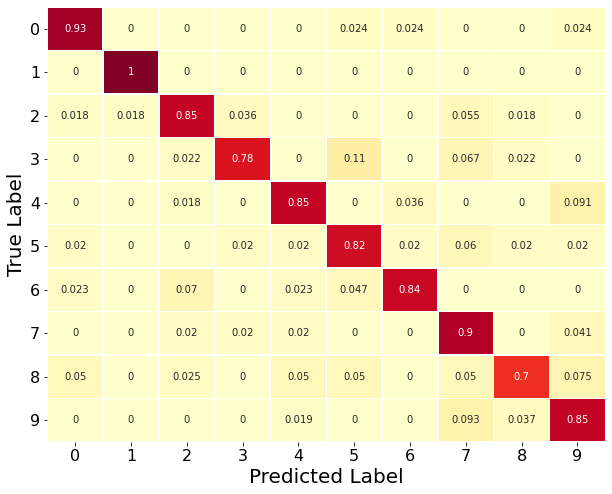

In [15]:
cm = nn_conf_mat(y_true, y_pred)

In [16]:
cm

array([[0.92857143, 0.        , 0.        , 0.        , 0.        ,
        0.02380952, 0.02380952, 0.        , 0.        , 0.02380952],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01818182, 0.01818182, 0.85454545, 0.03636364, 0.        ,
        0.        , 0.        , 0.05454545, 0.01818182, 0.        ],
       [0.        , 0.        , 0.02222222, 0.77777778, 0.        ,
        0.11111111, 0.        , 0.06666667, 0.02222222, 0.        ],
       [0.        , 0.        , 0.01818182, 0.        , 0.85454545,
        0.        , 0.03636364, 0.        , 0.        , 0.09090909],
       [0.02      , 0.        , 0.        , 0.02      , 0.02      ,
        0.82      , 0.02      , 0.06      , 0.02      , 0.02      ],
       [0.02325581, 0.        , 0.06976744, 0.        , 0.02325581,
        0.04651163, 0.8372093 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0204081

In [17]:
true_acc = model.evaluate(X_val_small, y_val_small)[1]
print(true_acc)
print(model.predict(X_val_small[:3]))

shape_0 = model.get_weights()[0].shape
print(shape_0)

old_first_weights = model.get_weights()[0]

# first_weights = [np.random.normal(size = shape_0)]
first_weights = [model.get_weights()[0]-1]
print(first_weights)
print(first_weights[0].shape)

all_weights = first_weights + model.get_weights()[1:]
# print(all_weights)

model.set_weights(all_weights)

fake_acc = model.evaluate(X_val_small, y_val_small)[1]
print(fake_acc)
print(model.predict(X_val_small[:3]))

old_weights = [old_first_weights] + model.get_weights()[1:]

model.set_weights(old_weights)

old_true_acc = model.evaluate(X_val_small, y_val_small)[1]
print(old_true_acc)
print(model.predict(X_val_small[:3]))

16/16 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.8600
0.8600000143051147
[[7.00685678e-06 2.02006554e-08 1.65749814e-08 4.05787830e-07
  6.73890943e-10 1.00596607e-08 2.50174148e-09 9.99959469e-01
  5.08412370e-08 3.29602881e-05]
 [1.82469435e-07 4.75756096e-05 9.99288261e-01 4.56912938e-04
  1.10221913e-06 9.60495672e-05 8.39743007e-05 7.80014719e-09
  2.38081739e-05 2.16259150e-06]
 [2.48835727e-06 9.99728262e-01 1.53836663e-04 2.66395909e-06
  1.26848445e-05 4.14828293e-07 3.67885877e-06 8.07470933e-05
  9.17114721e-06 6.13602015e-06]]
(784, 128)
[array([[-0.9825663 , -1.0448595 , -0.9829941 , ..., -1.081005  ,
        -1.039437  , -1.0173888 ],
       [-1.059742  , -1.0050594 , -0.9819378 , ..., -1.0406951 ,
        -0.95030135, -0.9664014 ],
       [-1.0499504 , -0.93690425, -1.0077294 , ..., -1.0569363 ,
        -0.9651943 , -1.0480372 ],
       ...,
       [-0.9385758 , -1.009917  , -0.9512942 , ..., -1.0546863 ,
        -0.93100244, -0.9971716 ]

Epoch 1/2
10/10 [==============================] - 1s 81ms/step - loss: 1.7884 - accuracy: 0.5633 - val_loss: 1.7169 - val_accuracy: 0.6000
Epoch 2/2
10/10 [==============================] - 1s 75ms/step - loss: 1.1305 - accuracy: 0.6800 - val_loss: 1.0823 - val_accuracy: 0.6920
Overall calculation took 2.057821035385132 seconds.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
______________________________________________________

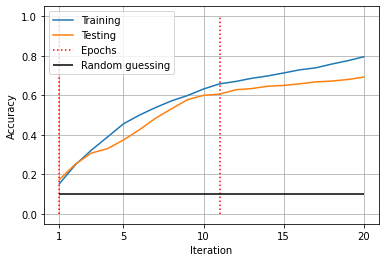

In [18]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols)
model = nn_model_compile(model,
                         optimizer = "adam")
train_acc = BatchAccuracy((X_train_small,
                           y_train_small))
test_acc = BatchAccuracy((X_val_small,
                          y_val_small))
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train_small,
                     y_train = y_train_small,
                     X_val = X_val_small,
                     y_val = y_val_small,
                     batch_size = 100,                             # change to batch_size
                     epochs = 2,                                   # change to epochs
                     callbacks = [train_acc, test_acc]
                     )
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
iteration_list = []
for epoch in range(2):                                             # change to epochs
    for b in range(10):                                            # change to int(np.ceil(len(X_train_small) / batch_size))
        iteration_list.append("Epoch: {}, Batch: {}.".format(epoch+1, b+1))
nn_plot_iter_acc(train_acc.acc,
                 test_acc.acc,
                 iteration_list,
                 mean_comparison = 1 / y_train.shape[1],
                 works = True)